## Tensorflow Regression problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
# Create Dataset
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
x_data[:20]

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05,
         3.00000300e-05,   4.00000400e-05,   5.00000500e-05,
         6.00000600e-05,   7.00000700e-05,   8.00000800e-05,
         9.00000900e-05,   1.00000100e-04,   1.10000110e-04,
         1.20000120e-04,   1.30000130e-04,   1.40000140e-04,
         1.50000150e-04,   1.60000160e-04,   1.70000170e-04,
         1.80000180e-04,   1.90000190e-04])

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
noise[:20]

array([ 2.76732201, -0.2117353 ,  0.57530761, -1.59020861, -0.07298724,
        1.09396242, -0.14466615,  0.0036404 ,  0.76255832, -0.85793542,
        1.77360565,  1.40328629, -0.82278109,  0.08639196, -0.18968939,
        2.35743388,  1.06559917, -0.05609029,  0.45812967, -1.29037811])

### y = mX + b

Initially, 

b = 5

m = 0.5

In [6]:
# y = mX + b + noise
y_true = (0.5 * x_data) + 5 + noise

In [7]:
X_data = pd.DataFrame(data=x_data,columns=['X'])

In [8]:
y_data = pd.DataFrame(data=y_true,columns=['y'])

In [9]:
X_data.head()

,X
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [10]:
y_data.head()

,y
0,7.767322
1,4.788270
2,5.575318
3,3.409806
4,4.927033


In [11]:
# Concatinate X and y along columns to make a single dataframe
df = pd.concat([X_data,y_data],axis=1)

In [12]:
df.head()

,X,y
0,0.00000,7.767322
1,0.00001,4.788270
2,0.00002,5.575318
3,0.00003,3.409806
4,0.00004,4.927033


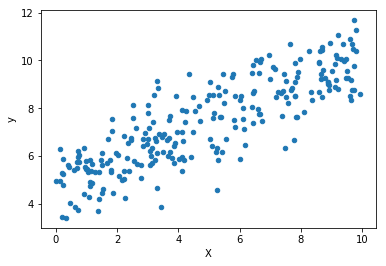

In [13]:
# Get 250 random sample values from dataframe and plot them
df.sample(n=250).plot(kind='scatter',x='X',y='y')

### Aim: Fit a Line to this data using Tensorflow

Create Batches of Data for a large dataset

In [14]:
# Define Batch Size for Data to be Input
# Here, batch_size = 10 i.e. each batch will have 10 (X,y) values
batch_size = 10

In [15]:
np.random.randn(2)

array([-1.84802351, -1.43623128])

In [16]:
# Weight
W = tf.Variable(1.580)

In [17]:
# Bias
b = tf.Variable(-0.050)

In [18]:
# Define Placeholders
# y = Wx + b
# Since, x takes in the value during run time, it is defined as a placeholder
# tf.placeholder(dtype, shape, name=None)
# Since, we'll be having batch size of 10 i.e. 10 samples per batch, x will have 10 values only. So, shape = [10].
x = tf.placeholder(tf.float32,[batch_size])

In [19]:
# Since, y will also have 10 values/labels due to batch_size = 10, so shape = [10].
y = tf.placeholder(tf.float32,[batch_size])

In [20]:
# y_pred
y_pred = W * x + b

In [21]:
# Loss Function
# error += (y - y_pred)**2
# tf.reduce_sum(): Computes the sum of elements across dimensions of a tensor.
error = tf.reduce_sum(tf.square(y - y_pred))

In [22]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [23]:
# Train
train = optimizer.minimize(error)

In [24]:
# Initialize all Variables
init = tf.global_variables_initializer()

In [25]:
# Run the Training inside the session
with tf.Session() as sess:
    sess.run(init)
    
    # Number of total batches
    # Batches = 1000
    # Each batch of size = 8 samples
    # Total samples = 8000
    batches = 1000
    
    for i in range(batches):
        # Get random Index from x_data equal to batch_size in number
        # ex. here it returns 10 random indexes within range "0 to 1000000".
        rand_idx = np.random.randint(len(x_data),size=batch_size)
        
        # Run the Gradient Descebt Optimizer to Reduce the Error 
        # x_data: Features, y_true: Labels ; Supervised Learning
        result,err = sess.run([train,error],feed_dict={x:x_data[rand_idx], y:y_true[rand_idx]})
       
        # Print Error at every Epoch
        if (i%100) == True:
            print('Epoch: {0} , Error: {1}'.format(i-1,err))
    
    print('Epoch: {0} , Error: {1}'.format(1000,err))
        
    # Get new values of Weight & Bias
    model_W, model_b = sess.run([W,b])

Epoch: 0 , Error: 82.07841491699219
Epoch: 100 , Error: 11.181694030761719
Epoch: 200 , Error: 18.91692352294922
Epoch: 300 , Error: 14.597614288330078
Epoch: 400 , Error: 12.931413650512695
Epoch: 500 , Error: 11.388772964477539
Epoch: 600 , Error: 10.438874244689941
Epoch: 700 , Error: 11.495786666870117
Epoch: 800 , Error: 14.663752555847168
Epoch: 900 , Error: 12.477667808532715
Epoch: 1000 , Error: 2.9824705123901367


In [26]:
model_W

0.52382606

In [27]:
model_b

4.9534988

In [28]:
y_hat = model_W * x_data + model_b

In [29]:
y_hat

array([  4.95349884,   4.95350408,   4.95350932, ...,  10.19174899,
        10.19175423,  10.19175947])

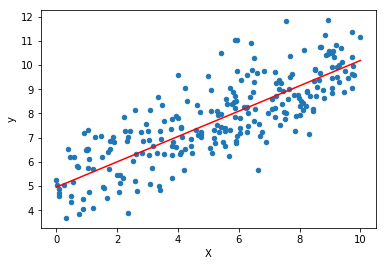

In [30]:
# Plot the Regression Line
df.sample(n=250).plot(kind='scatter',x='X',y='y')
plt.plot(x_data,y_hat,'r')

## Tensorflow Estimator API

In [31]:
# Define a List of Feature Columns
feat_cols = [tf.feature_column.numeric_column(key='x',shape=[1])]

In [32]:
# Create the Estimator Model
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\HAREKR~1\\AppData\\Local\\Temp\\tmp162dce47', '_session_config': None, '_save_checkpoints_steps': None, '_save_summary_steps': 100}


In [33]:
# Train Test Split using Scikit Learn
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_val, y_train, y_val = train_test_split(x_data,y_true,test_size = 0.3, random_state=101)

In [35]:
X_train.shape

(700000,)

In [36]:
X_val.shape

(300000,)

In [37]:
# Set up Estimator Inputs
input_func = tf.estimator.inputs.numpy_input_fn({'x': X_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [38]:
# Set up Estimator Training Inputs
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': X_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [39]:
# Set up Estimator Test Inputs
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': X_val}, y_val, batch_size=8, num_epochs=1000, shuffle=False)

In [40]:
# Train the Estimator
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\HAREKR~1\AppData\Local\Temp\tmp162dce47\model.ckpt.
INFO:tensorflow:step = 1, loss = 448.539
INFO:tensorflow:global_step/sec: 882.304
INFO:tensorflow:step = 101, loss = 29.3388 (0.113 sec)
INFO:tensorflow:global_step/sec: 836.749
INFO:tensorflow:step = 201, loss = 7.55325 (0.124 sec)
INFO:tensorflow:global_step/sec: 694.329
INFO:tensorflow:step = 301, loss = 19.7968 (0.144 sec)
INFO:tensorflow:global_step/sec: 714.31
INFO:tensorflow:step = 401, loss = 4.71653 (0.136 sec)
INFO:tensorflow:global_step/sec: 869.185
INFO:tensorflow:step = 501, loss = 14.9275 (0.119 sec)
INFO:tensorflow:global_step/sec: 833.283
INFO:tensorflow:step = 601, loss = 11.7815 (0.120 sec)
INFO:tensorflow:global_step/sec: 757.523
INFO:tensorflow:step = 701, loss = 17.9598 (0.132 sec)
INFO:tensorflow:global_step/sec: 862.007
INFO:tensorflow:step = 801, loss = 19.306 (0.116 sec)
INFO:tensorflow:global_step/sec: 853.695
I

In [41]:
# Get Evaluation Metrics
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2017-12-27-17:29:31
INFO:tensorflow:Restoring parameters from C:\Users\HAREKR~1\AppData\Local\Temp\tmp162dce47\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [2

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [862/1000]
INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorf

In [42]:
# Check the Performance on Test Data
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2017-12-27-17:29:43
INFO:tensorflow:Restoring parameters from C:\Users\HAREKR~1\AppData\Local\Temp\tmp162dce47\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [2

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [862/1000]
INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorf

In [43]:
print('Training Data Metrics: \n')
print(train_metrics)

Training Data Metrics: 

{'global_step': 1000, 'average_loss': 1.06917, 'loss': 8.55336}


In [44]:
print('Eval Metrics: \n')
print(eval_metrics)

Eval Metrics: 

{'global_step': 1000, 'average_loss': 1.0554856, 'loss': 8.4438848}


In [46]:
# Get Predicitions
# New Data model has never seen
brand_new_data = np.linspace(0,10,10)

input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data}, shuffle=False)

In [48]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from C:\Users\HAREKR~1\AppData\Local\Temp\tmp162dce47\model.ckpt-1000


INFO:tensorflow:Restoring parameters from C:\Users\HAREKR~1\AppData\Local\Temp\tmp162dce47\model.ckpt-1000


[{'predictions': array([ 4.44651747], dtype=float32)},
 {'predictions': array([ 5.0944376], dtype=float32)},
 {'predictions': array([ 5.74235725], dtype=float32)},
 {'predictions': array([ 6.39027691], dtype=float32)},
 {'predictions': array([ 7.03819752], dtype=float32)},
 {'predictions': array([ 7.68611717], dtype=float32)},
 {'predictions': array([ 8.33403683], dtype=float32)},
 {'predictions': array([ 8.98195648], dtype=float32)},
 {'predictions': array([ 9.62987709], dtype=float32)},
 {'predictions': array([ 10.27779675], dtype=float32)}]

In [49]:
# Plot Predicted Values
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\HAREKR~1\AppData\Local\Temp\tmp162dce47\model.ckpt-1000


INFO:tensorflow:Restoring parameters from C:\Users\HAREKR~1\AppData\Local\Temp\tmp162dce47\model.ckpt-1000


In [50]:
predictions

[array([ 4.44651747], dtype=float32),
 array([ 5.0944376], dtype=float32),
 array([ 5.74235725], dtype=float32),
 array([ 6.39027691], dtype=float32),
 array([ 7.03819752], dtype=float32),
 array([ 7.68611717], dtype=float32),
 array([ 8.33403683], dtype=float32),
 array([ 8.98195648], dtype=float32),
 array([ 9.62987709], dtype=float32),
 array([ 10.27779675], dtype=float32)]

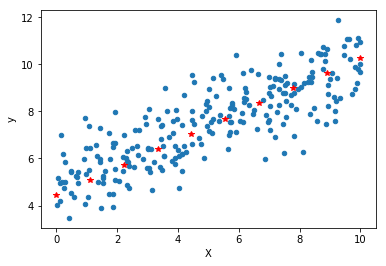

In [52]:
df.sample(n=250).plot(kind='scatter', x='X',y='y')
plt.plot(brand_new_data,predictions,'r*')